In [1]:
import pandas as pd
import os
import scipy.stats as st
import matplotlib.pyplot as plt

file_to_load = os.path.join("..", "airbnb", "AirBnB 2019", "calendar_2019.csv")
list_to_load = os.path.join("..", "airbnb", "AirBnB 2019", "listings_2019.csv")

cal_2019 = pd.read_csv(file_to_load)
list_2019 = pd.read_csv(list_to_load, low_memory = False)
list_2019_price = list_2019[['id','price','city']]
list_2019_price = list_2019_price.rename(columns = {'id':'listing_id'})
list_2019_price

FileNotFoundError: [Errno 2] File ..\airbnb\AirBnB 2019\calendar_2019.csv does not exist: '..\\airbnb\\AirBnB 2019\\calendar_2019.csv'

In [ ]:
sum_list_2019 = list_2019[['id','name','host_response_time','host_response_rate','host_is_superhost',
                       'street','neighborhood','city','suburb','state','zipcode',
                       'country','latitude','longitude','property_type','room_type',
                       'accommodates','bathrooms','bedrooms','beds', 'amenities','price',
                       'security_deposit', 'cleaning_fee', 'has_availability',
                       'availability_365', 'number_of_reviews','review_scores_rating',
                       'review_scores_accuracy', 'review_scores_cleanliness',
                       'review_scores_checkin', 'review_scores_communication',
                       'review_scores_location', 'review_scores_value','reviews_per_month']]


## Which neighbourhoods have the most individual listings?

## How has this changed between datasets

## Which neighbourhoods are the most expensive?

## What price variance do we see in a suburb and why?

## 

In [2]:
file_to_load = os.path.join("..", "airbnb", "AirBnB 2020", "calendar_2020.csv")
list_to_load = os.path.join("..", "airbnb", "AirBnB 2020", "listings_2020.csv")
#file_to_load = "../airbnb/AirBnB 2020/calendar_2020.csv"
cal_2020 = pd.read_csv(file_to_load)

cal_2020['date'] = pd.to_datetime(cal_2020['date'])
cal_2020['day'] = cal_2020['date'].dt.day
cal_2020['month'] = cal_2020['date'].dt.month
cal_2020['year'] = cal_2020['date'].dt.year

month_2020 = cal_2020.groupby(['year','month']).count()
month_2020

list_2020 = pd.read_csv(list_to_load, low_memory = False)
list_2020['price'] = list_2020['price'].replace('[\$,]', '', regex=True).astype(float)
list_2020["price"] = list_2020["price"].astype(int)

list_2020_price = list_2020[['id','price']]
list_2020_price = list_2020_price.rename(columns = {'id':'listing_id'})
list_2020_price

FileNotFoundError: [Errno 2] File ..\airbnb\AirBnB 2020\calendar_2020.csv does not exist: '..\\airbnb\\AirBnB 2020\\calendar_2020.csv'

In [3]:
days_cost = pd.merge(cal_2019, list_2019_price, on = 'listing_id', how = 'left')
daily_price_2019 = days_cost.groupby('listing_id').mean()
daily_price_2019.describe()

NameError: name 'cal_2019' is not defined

In [5]:
#Finding all available booking ID's and total days available
avail_2019 = cal_2019.loc[cal_2019['available'] == 't']
avail_2019 = avail_2019.groupby('listing_id').count()
avail_2019 = pd.merge(avail_2019, list_2019_price, on = 'listing_id', how = 'left')
avail_2019 = avail_2019.rename(columns = {'available':'Number of Days Available',
                                          'price_y': 'Price per Night'})
avail_2019 = avail_2019[['listing_id','Number of Days Available','Price per Night', 'city']]
avail_2019

,listing_id,Number of Days Available,Price per Night,city
0,9835,365,60,Manningham
1,10803,213,35,Moreland
2,12936,326,159,Port Phillip
3,16760,328,69,Port Phillip
4,38271,328,98,Casey
...,...,...,...,...
17392,30592332,82,55,Melbourne
17393,30592345,365,129,Melton
17394,30592362,15,53,Monash
17395,30592590,349,130,Melbourne


In [6]:
#Finding all booked listing_id's and number of days booked
booked_2019 = cal_2019.loc[cal_2019['available'] == 'f']
booked_2019 = booked_2019.groupby('listing_id').count()
booked_2019 = pd.merge(booked_2019, list_2019_price, on = 'listing_id', how = 'left')
booked_2019 = booked_2019.rename(columns = {'available':'Number of Days Booked',
                                          'price_y': 'Price per Night'})
booked_2019 = booked_2019[['listing_id','Number of Days Booked','Price per Night', 'city']]
booked_2019

,listing_id,Number of Days Booked,Price per Night,city
0,10803,152,35,Moreland
1,12936,39,159,Port Phillip
2,15246,365,50,Darebin
3,16760,37,69,Port Phillip
4,38271,37,98,Casey
...,...,...,...,...
22326,30592128,336,30,Melbourne
22327,30592332,283,55,Melbourne
22328,30592362,350,53,Monash
22329,30592590,16,130,Melbourne


In [7]:
days_per_city = booked_2019.groupby("city")['Number of Days Booked'].count()
#days_per_city.sort()
#days_per_city.sort_values(ascending = False)

In [8]:
#Finding all available booking ID's and total days available
avail_2020 = cal_2020.loc[cal_2020['available'] == 't']
avail_2020 = avail_2020.groupby('listing_id').count()
avail_2020 = pd.merge(avail_2020, list_2020_price, on = 'listing_id', how = 'left')
avail_2020 = avail_2020.rename(columns = {'available':'Number of Days Available',
                                          'price_y': 'Price per Night'})
avail_2020 = avail_2020[['listing_id','Number of Days Available','Price per Night']]
avail_2020

,listing_id,Number of Days Available,Price per Night
0,9835,365,60
1,10803,1,31
2,38271,329,99
3,43429,347,99
4,44082,365,79
...,...,...,...
13653,45003540,358,265
13654,45003765,43,50
13655,45004813,365,188
13656,45004915,34,24


In [9]:
#Finding all booked listing_id's and number of days booked
booked_2020 = cal_2020.loc[cal_2020['available'] == 'f']
booked_2020 = booked_2020.groupby('listing_id').count()
booked_2020 = pd.merge(booked_2020, list_2020_price, on = 'listing_id', how = 'left')
booked_2020 = booked_2020.rename(columns = {'available':'Number of Days Booked',
                                          'price_y': 'Price per Night'})
booked_2020 = booked_2020[['listing_id','Number of Days Booked','Price per Night']]
booked_2020

,listing_id,Number of Days Booked,Price per Night
0,10803,364,31
1,12936,365,95
2,38271,36,99
3,41836,367,40
4,43429,18,99
...,...,...,...
18687,45003372,3,90
18688,45003540,7,265
18689,45003765,322,50
18690,45004915,331,24


In [10]:
cal_group = days_cost.groupby(['listing_id','available']).count()

cal_group

date  price_x  price_y  city
listing_id available                              
9835       t           365      365      365   365
10803      f           152        0      152   152
           t           213      213      213   213
12936      f            39        0       39    39
           t           326      326      326   326
...                    ...      ...      ...   ...
30592362   t            15       15       15    15
30592590   f            16        0       16    16
           t           349      349      349   349
30593623   f           297        0      297   297
           t            68       68       68    68

[39728 rows x 4 columns]

In [11]:
cal_2019['date'] = pd.to_datetime(cal_2019['date'])
cal_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8356675 entries, 0 to 8356674
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 255.0+ MB


In [12]:
cal_2019['day'] = cal_2019['date'].dt.day
cal_2019['month'] = cal_2019['date'].dt.month
cal_2019['year'] = cal_2019['date'].dt.year

In [13]:
month_2019 = cal_2019.groupby(['year','month']).count()
month_2019

listing_id    date  available   price     day
year month                                               
2018 12         572360  572360     572360  186899  572360
2019 1          709745  709745     709745  312593  709745
     2          641060  641060     641060  323736  641060
     3          709745  709745     709745  307871  709745
     4          686850  686850     686850  295074  686850
     5          709745  709745     709745  315288  709745
     6          686850  686850     686850  231450  686850
     7          709745  709745     709745  226422  709745
     8          709745  709745     709745  227130  709745
     9          686850  686850     686850  207415  686850
     10         709745  709745     709745  213627  709745
     11         686850  686850     686850  205241  686850
     12         137385  137385     137385   41446  137385

### Correlation between Review Score Rating and Price per Night in 2019

The r value is: 0.04


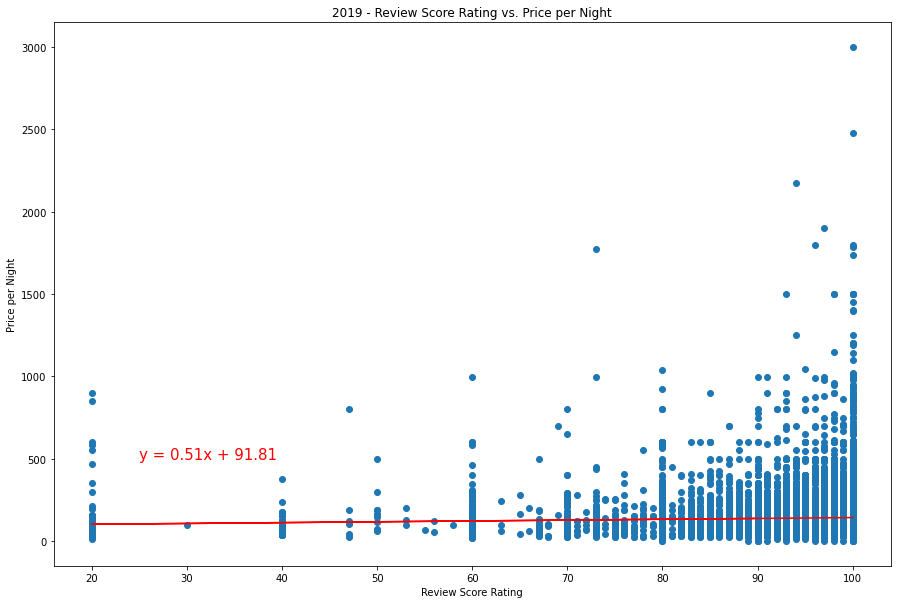

In [14]:
price_rate_2019 = sum_list_2019[["id","price", "review_scores_rating"]]
clean_price_rate_2019 = price_rate_2019.dropna()

x_values = clean_price_rate_2019["review_scores_rating"]
y_values = clean_price_rate_2019["price"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,500),fontsize=15,color="red")
plt.xlabel('Review Score Rating')
plt.ylabel('Price per Night')
plt.title("2019 - Review Score Rating vs. Price per Night")
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("2019_ReviewScore_vs_Price")
plt.show()


### Correlation between Review Score Rating and Price per Night in 2020

The r value is: 0.03


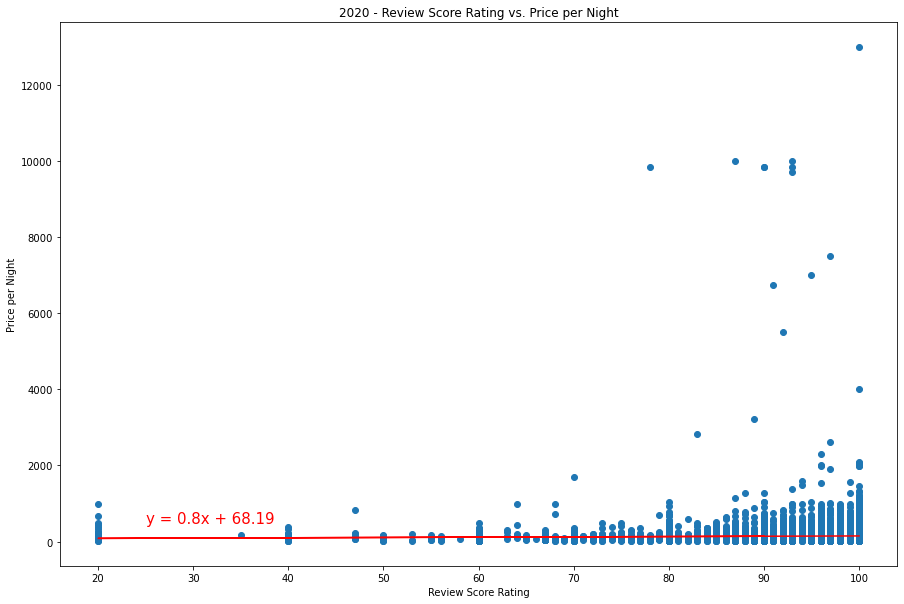

In [15]:
price_rate_2020 = list_2020[["price", "review_scores_rating"]]
clean_price_rate_2020 = price_rate_2020.dropna()

x_values = clean_price_rate_2020["review_scores_rating"]
y_values = clean_price_rate_2020["price"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,500),fontsize=15,color="red")
plt.xlabel('Review Score Rating')
plt.ylabel('Price per Night')
plt.title("2020 - Review Score Rating vs. Price per Night")
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("2020_ReviewScore_vs_Price")
plt.show()

### Correlation between Number of Days Booked and Price per Night in 2019

The r value is: -0.11


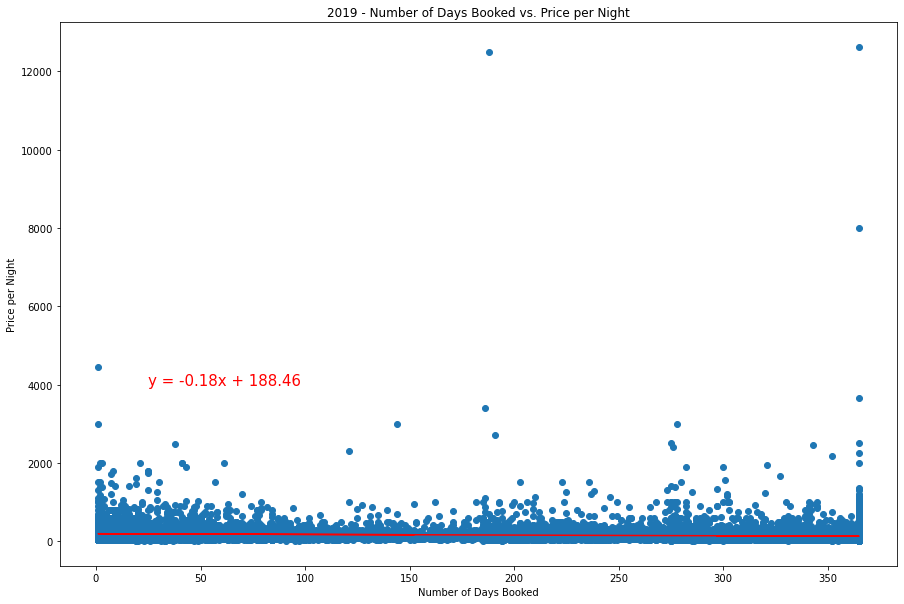

In [16]:
x_values = booked_2019["Number of Days Booked"]
y_values = booked_2019["Price per Night"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,4000),fontsize=15,color="red")
plt.xlabel('Number of Days Booked')
plt.ylabel('Price per Night')
plt.title("2019 - Number of Days Booked vs. Price per Night")
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("2019_DaysBooked_vs_Price")
plt.show()

### Correlation between Number of Days Booked and Price per Night in 2020

The r value is: -0.04


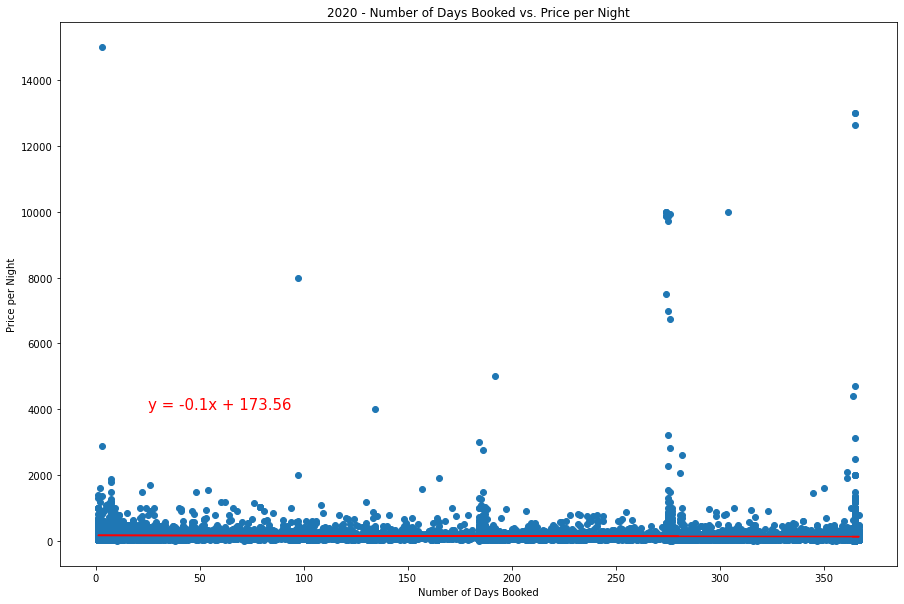

In [17]:
x_values = booked_2020["Number of Days Booked"]
y_values = booked_2020["Price per Night"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,4000),fontsize=15,color="red")
plt.xlabel('Number of Days Booked')
plt.ylabel('Price per Night')
plt.title("2020 - Number of Days Booked vs. Price per Night")
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("2020_DaysBooked_vs_Price")
plt.show()

### Correlation between Number of Days Booked and Host Response Rate in 2019

The r value is: -0.34


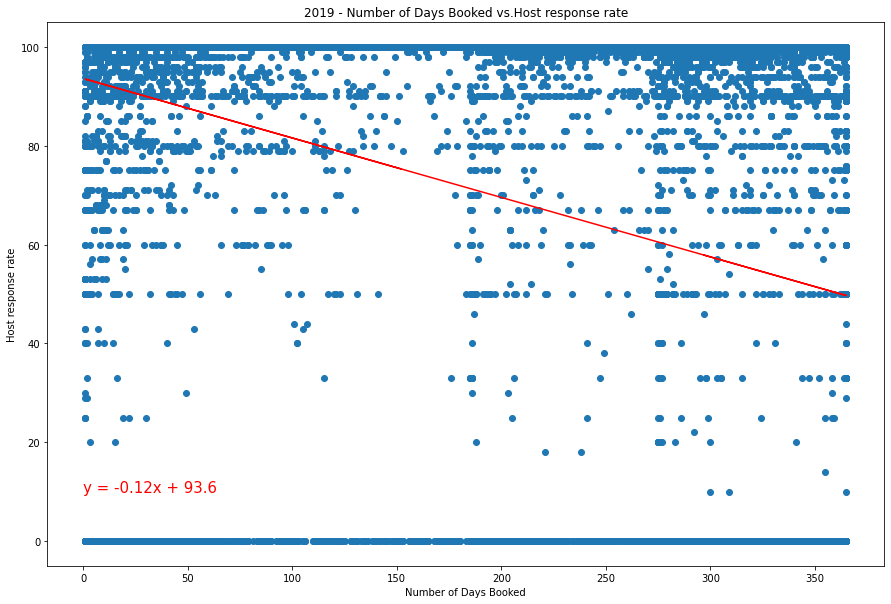

In [18]:
resp_rate_days_2019 = sum_list_2019[["id","host_response_rate"]]
resp_rate_days_2019 = resp_rate_days_2019.rename(columns = {"id":"listing_id"})

resp_rate_days_2019 = pd.merge(resp_rate_days_2019, booked_2019, on = 'listing_id', how = 'right')

resp_rate_days_2019.fillna(value=0,inplace=True)

resp_rate_days_2019['host_response_rate'] = resp_rate_days_2019['host_response_rate'].replace('%', '', regex=True).astype(int)


x_values = resp_rate_days_2019["Number of Days Booked"]
y_values = resp_rate_days_2019["host_response_rate"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel('Number of Days Booked')
plt.ylabel('Host response rate')
plt.title("2019 - Number of Days Booked vs.Host response rate")
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("2019_DaysBooked_vs_HostResponseRate")
plt.show()

### Correlation between Number of Days Booked and Host Response Rate in 2020

The r value is: -0.4


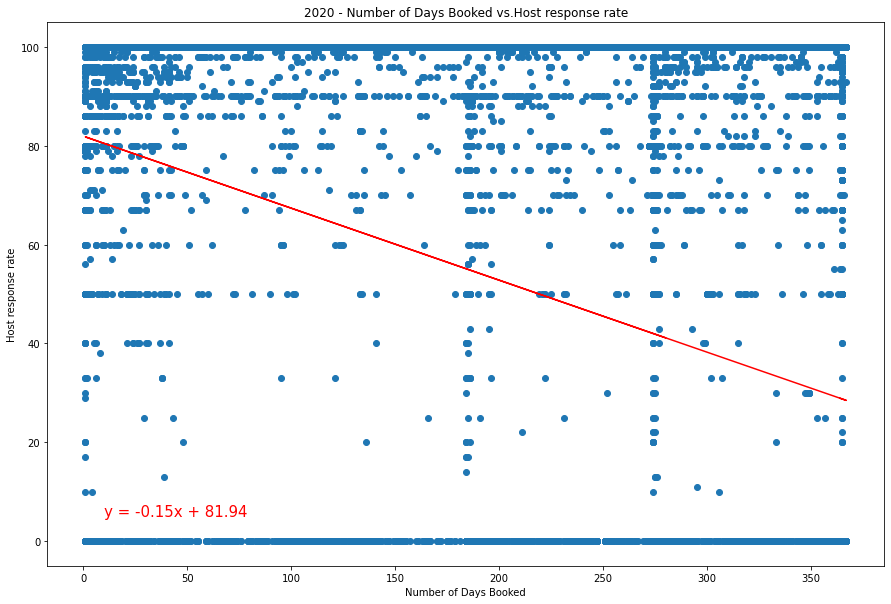

In [19]:
resp_time_days_2020 = list_2020[["id","host_response_rate"]]
resp_time_days_2020 = resp_time_days_2020.rename(columns = {"id":"listing_id"})

resp_time_days_2020 = pd.merge(resp_time_days_2020, booked_2020, on = 'listing_id', how = 'right')

resp_time_days_2020.fillna(value=0,inplace=True)

resp_time_days_2020['host_response_rate'] = resp_time_days_2020['host_response_rate'].replace('%', '', regex=True).astype(int)


x_values = resp_time_days_2020["Number of Days Booked"]
y_values = resp_time_days_2020["host_response_rate"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.xlabel('Number of Days Booked')
plt.ylabel('Host response rate')
plt.title("2020 - Number of Days Booked vs.Host response rate")
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("2020_DaysBooked_vs_HostResponseRate")
plt.show()

### Comparison between Room Type and Mean Number of Days booked in 2019 & 2020

In [20]:
prop_type_days_2019 = sum_list_2019[["id","room_type"]]
prop_type_days_2019 = prop_type_days_2019.rename(columns = {"id":"listing_id"})
prop_type_days_2019 = pd.merge(prop_type_days_2019, booked_2019, on = 'listing_id', how = 'right')

smry_prop_type_days_2019 = prop_type_days_2019.groupby("room_type").mean()
smry_prop_type_days_2019.sort_values("Number of Days Booked", ascending=False, inplace=True)
smry_prop_type_days_2019

,listing_id,Number of Days Booked,Price per Night
room_type,,,
Shared room,2.125083e+07,278.941176,48.147059
Private room,1.890974e+07,251.235799,76.290394
Entire home/apt,1.862952e+07,226.121845,187.818003


In [21]:
prop_type_days_2020 = list_2020[["id","room_type"]]
prop_type_days_2020 = prop_type_days_2020.rename(columns = {"id":"listing_id"})
prop_type_days_2020 = pd.merge(prop_type_days_2020, booked_2020, on = 'listing_id', how = 'right')

smry_prop_type_days_2020 = prop_type_days_2020.groupby("room_type").mean()
smry_prop_type_days_2020.sort_values("Number of Days Booked", ascending=False, inplace=True)
smry_prop_type_days_2020

,listing_id,Number of Days Booked,Price per Night
room_type,,,
Shared room,2.920812e+07,267.890141,54.963380
Private room,2.637645e+07,256.258458,87.839178
Entire home/apt,2.584060e+07,229.238128,184.279273
Hotel room,2.890528e+07,181.909091,215.272727


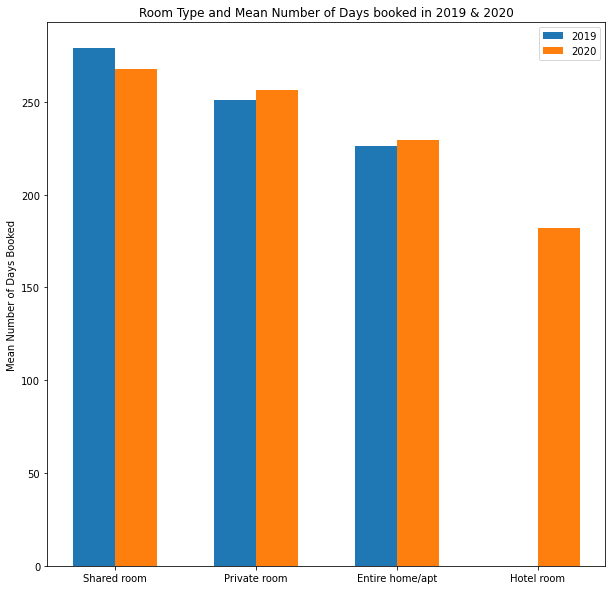

In [22]:
plt.figure(figsize=(10,10))
plt.bar(smry_prop_type_days_2019.index.values, smry_prop_type_days_2019["Number of Days Booked"], align='edge', width=-0.3, label="2019")
plt.bar(smry_prop_type_days_2020.index.values, smry_prop_type_days_2020["Number of Days Booked"], align='edge', width=0.3, label="2020")
plt.legend()
plt.ylabel("Mean Number of Days Booked")
plt.title("Room Type and Mean Number of Days booked in 2019 & 2020")
plt.savefig("2020_2019_AvgDaysBooked_vs_RoomType")
plt.show()